In [149]:
import numpy as np
import matplotlib.pyplot as plt

(18,)


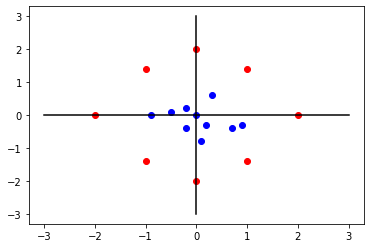

In [150]:
x = np.array([[0,     0    ],
              [-0.5,  0.1  ],
              [0.9,   -0.3 ],
              [0.1,   -0.8 ],
              [0.3,   0.6  ],
              [0.7,   -0.4 ],
              [-0.2,  0.2  ],
              [0.2,  -0.3  ],
              [-0.2, -0.4  ],
              [-0.9, 0     ],  # 0, 10
              [2,    0     ],
              [-2,   0     ],
              [0,    2     ],
              [0,    -2    ],
              [1,    1.4   ],
              [1,    -1.4  ],
              [-1,   1.4   ],
              [-1,   -1.4  ]])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])
print(y.shape)
for i, e in enumerate(x):
    if y[i] == 0:
        plt.scatter(e[0], e[1], color = "blue")
    else:
        plt.scatter(e[0], e[1], color = "red")
plt.plot(np.linspace(0, 0, 9), np.linspace(-3, 3, 9), color = "black")
plt.plot(np.linspace(-3, 3, 9), np.linspace(0, 0, 9), color = "black")

In [151]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [110]:
t0, t1, t2, t3, t4 = 0.5, 0.5, 0.5, 0.5, 0.5

In [152]:
def circleLogisticRegression(x, y, learningRate = 0.01, iterations = 1):
    global t0, t1, t2, t3, t4
    x1, x2, x3, x4 = x[:,0], x[:,1], x[:,0] ** 2, x[:,1]  ** 2
    m = len(x)
    costs = []
    for i in range(1, iterations + 1):
        z = t0 + t1 * x1 + t2 * x2 + t3 * x3 + t4 * x4
        h = sigmoid(z)
        cost = (-1 / m) * sum(y * np.log(h) + (1 - y) * np.log(1 - h))
        dcost_dt0 = (1 / m) * sum(h - y)
        dcost_dt1 = (1 / m) * sum((h - y) * x1)
        dcost_dt2 = (1 / m) * sum((h - y) * x2)
        dcost_dt3 = (1 / m) * sum((h - y) * x3)
        dcost_dt4 = (1 / m) * sum((h - y) * x4)
        t0 = t0 - learningRate * dcost_dt0
        t1 = t1 - learningRate * dcost_dt1
        t2 = t2 - learningRate * dcost_dt2
        t3 = t3 - learningRate * dcost_dt3
        t4 = t4 - learningRate * dcost_dt4
        if (i % (iterations // 10)) == 0 or i == 1 or i == iterations:
            print(cost)
            costs.append(cost)
    plt.plot(costs)
    return t0, t1, t2, t3, t4

In [153]:
def predict(x):
    x1, x2, x3, x4 = x[0], x[1], x[0] ** 2, x[1]  ** 2
    h = sigmoid(t0 + t1 * x1 + t2 * x2 + t3 * x3 + t4 * x4)
    if h >= 0.5:
        return 1
    else: 
        return 0

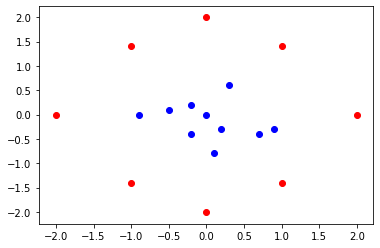

In [160]:
for i, e in enumerate(x):
    if y[i] >= 0.5:
        plt.scatter(e[0], e[1], color = "red")
    else:
        plt.scatter(e[0], e[1], color = "blue")

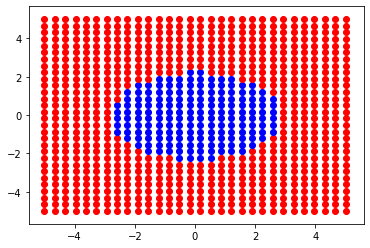

In [168]:
for i in np.linspace(-5, 5, 30):
    for j in np.linspace(-5, 5, 30):
        if (1 / (1 + (np.exp(-(t0 + t1 * i + t2 * j + t3 * i ** 2 + t4 * j ** 2))))) == 1:
            plt.scatter(i, j, color = "red")
        else:
            plt.scatter(i, j, color = "blue")

2.5174500470347212e-05
2.5009916126019905e-05
2.4847317927165305e-05
2.468682974843137e-05
2.4528410710325768e-05
2.437202098349772e-05
2.4217621755394368e-05
2.4065175197824168e-05
2.3914644436087113e-05
2.376599351899342e-05
2.361918739014067e-05


(-15.192921534083208,
 -0.2395990390420154,
 0.6010109961599129,
 6.616997839819955,
 9.970349024609382)

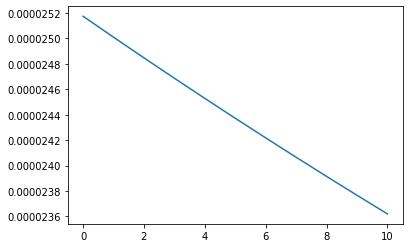

In [136]:
circleLogisticRegression(x, y, 1, 10000)